In [56]:
import pandas as pd
import matplotlib.pyplot as plt

#load the data
df = pd.read_csv("C:/Users/Bhavika/OneDrive/Desktop/practice/behaviour_simulation_train2.csv",encoding='cp1252')

#clean the data
df = df.dropna(subset =['id','date','likes','content','username','media','inferred company'])
df['likes'] = df['likes'].fillna(0)
df['inferred company'] = df['inferred company'].str.strip().str.lower()
df["content"] = df["content"].str.replace("<hyperlink>","  ")
df["content"] = df["content"].str.replace("<mention>","  ")
#df.info()
#df.describe()

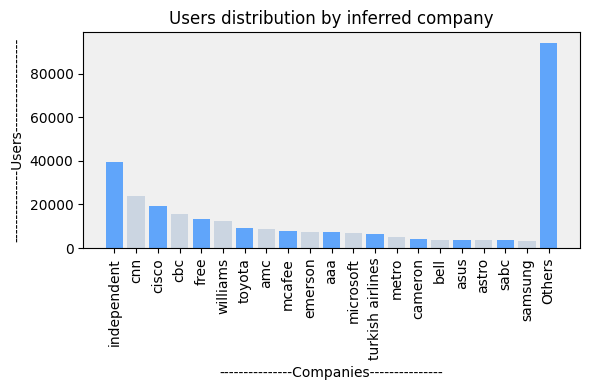

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# USER COUNT PER INFERRED COMPANY
company_counts = df['inferred company'].value_counts()

# TOP 10 COMAPANY AND OTHERS
top_20 = company_counts[:20]
others_sum = company_counts[20:].sum()

# ADDITION OF TOP 20 AND OTHERS COMPANY
final_counts = pd.concat([top_20, pd.Series({'Others': others_sum})])

#COLORS COMBINATION
colors = ['#60a5fa' if i%2==0  else '#cbd5e1' for i in range(len(final_counts))]

# BAR GRAPH OF THE DATA
plt.figure(figsize=(6,4))
plt.bar(final_counts.index, final_counts.values , color = colors)
plt.title('Users distribution by inferred company')
plt.xlabel('---------------Companies---------------')
plt.ylabel('---------------Users-------------------')
plt.xticks(rotation=90)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

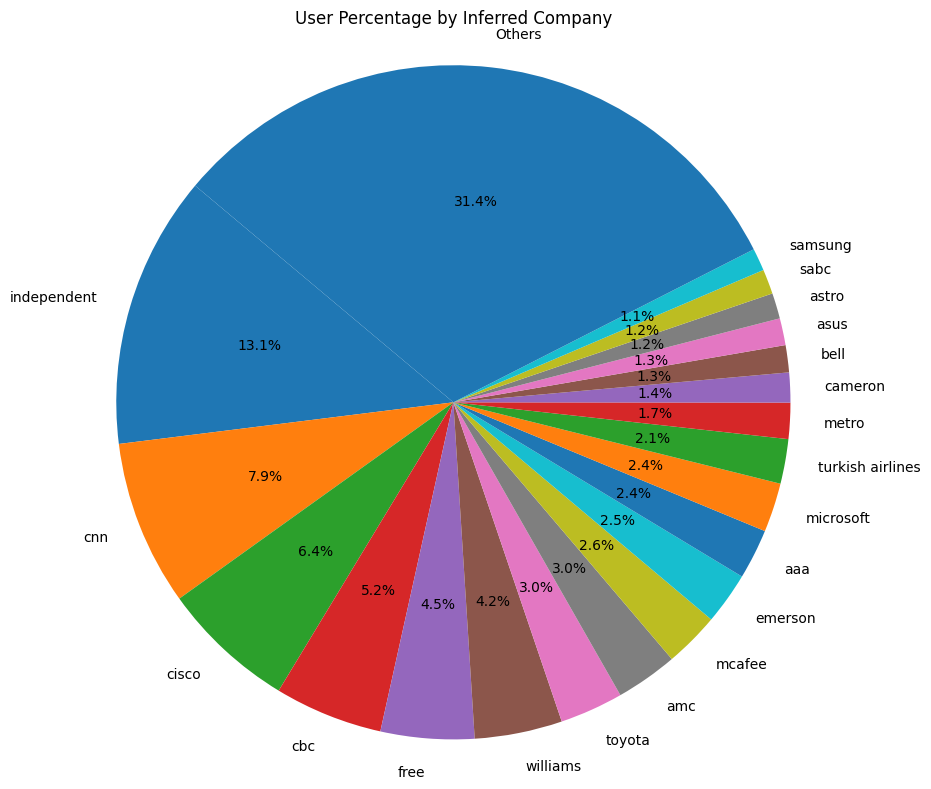

In [3]:
import matplotlib.pyplot as plt
# USER COUNT PER INFERRED COMPANY
company_counts = df['inferred company'].value_counts()

# TOP 10 COMAPANY AND OTHERS
top_20 = company_counts[:20]
others_sum = company_counts[20:].sum()

# ADDITION OF TOP 20 AND OTHERS COMPANY
final_counts = pd.concat([top_20, pd.Series({'Others': others_sum})])

plt.figure(figsize=(9, 8))
plt.pie(final_counts.values,labels=final_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('User Percentage by Inferred Company')
plt.axis('equal')
plt.tight_layout()
plt.show()


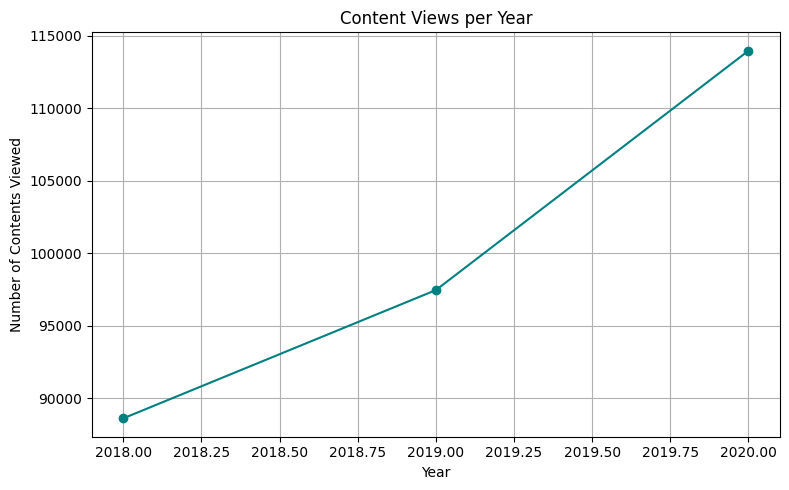

In [4]:
import matplotlib.pyplot as plt
import pandas as pd



df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
yearly_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='teal')
plt.title('Content Views per Year')
plt.xlabel('Year')
plt.ylabel('Number of Contents Viewed')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:

df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

In [7]:
df

,id,date,likes,content,username,media,inferred company,year,datetime
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,2020,2020-12-12 00:47:00
1,2,2018-06-30 10:04:20,2750,watch rapper freestyle for over an hour,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018,2018-06-30 10:04:20
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,2020,2020-09-29 19:47:28
3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,2020,2020-10-01 11:40:09
4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of ! she w...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2018,2018-10-19 14:30:46
...,...,...,...,...,...,...,...,...,...
299995,299996,2019-09-07 16:18:10,0,barcelona star expected to return against vale...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,2019,2019-09-07 16:18:10
299996,299997,2018-02-23 11:24:36,46,kjeld nuis of #ned is golden again... this tim...,CBCOlympics,[Video(thumbnailUrl='https://pbs.twimg.com/med...,cbc,2018,2018-02-23 11:24:36
299997,299998,2020-11-11 20:18:15,261,grateful ???? to have officially join ! ??,TeamCoachBuzz,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,2020,2020-11-11 20:18:15
299998,299999,2019-10-29 10:44:00,119,the us air force's mysterious space plane just...,Independent,[Video(thumbnailUrl='https://pbs.twimg.com/med...,independent,2019,2019-10-29 10:44:00


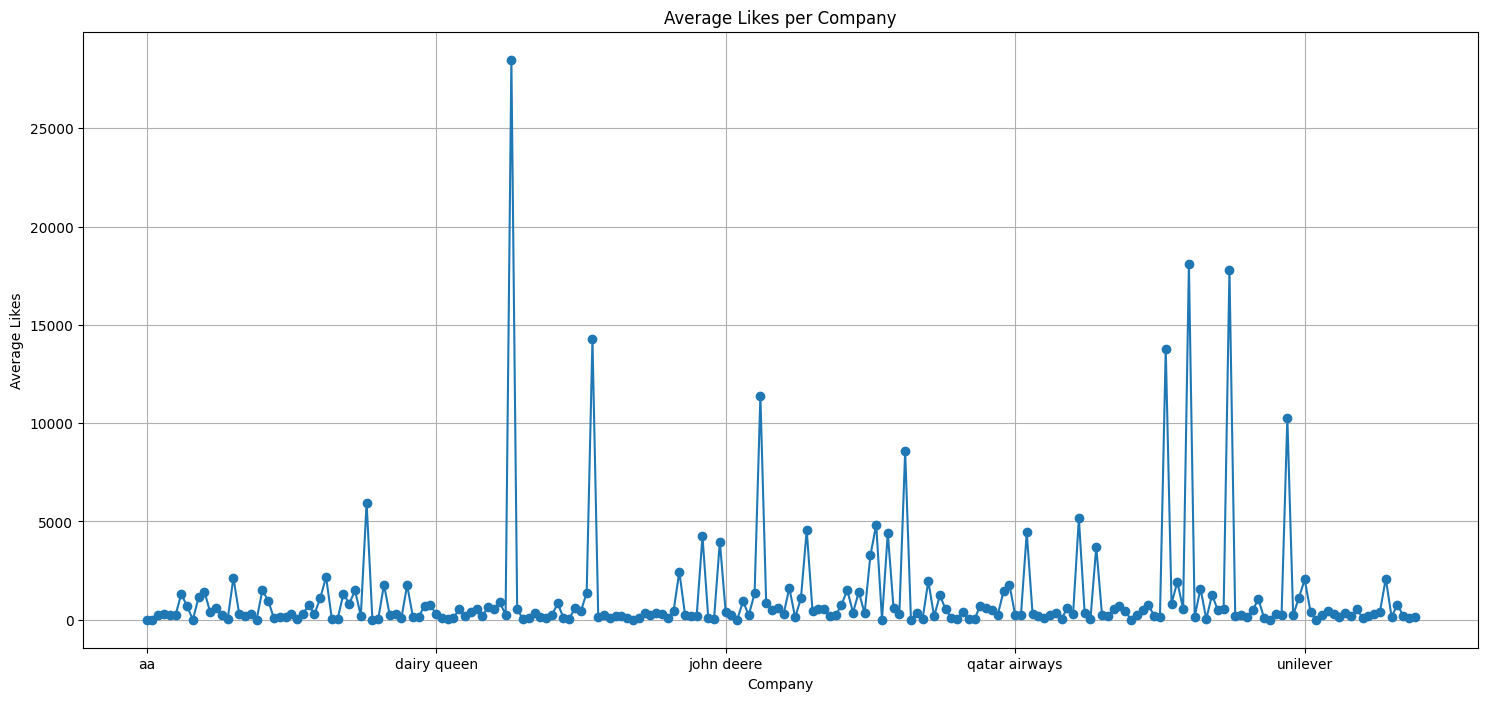

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

company_likes = df.groupby('inferred company')['likes'].sum().sort_values()
top_10 = company_likes[:10]
others_sum = company_likes[10:].sum()
final_counts = pd.concat([top_10, pd.Series({'Others': others_sum})])


# Calculate average likes per company
avg_likes = df.groupby('inferred company')['likes'].mean()
plt.figure(figsize=(18,8))
#line chart
avg_likes.plot(kind='line', marker='o')
plt.xlabel('Company')
plt.ylabel('Average Likes')
plt.title('Average Likes per Company')
plt.grid(True)
plt.show()

In [57]:
import pandas as pd

unique_companies = df['inferred company'].unique()[:10]
for company in unique_companies:
    total_likes = df[df['inferred company'] == company]['likes'].sum()
    print(f"Total likes for {company}: {total_likes}")

Total likes for tim hortons: 129265
Total likes for independent: 1933314
Total likes for cbc: 3184156
Total likes for williams: 26390697
Total likes for cnn: 42572321
Total likes for cisco: 534353
Total likes for getty images: 551188
Total likes for mcafee: 8577051
Total likes for trane: 946
Total likes for pfizer: 64828


['tim hortons']
['tim hortons', 'independent']
['tim hortons', 'independent', 'cbc']
['tim hortons', 'independent', 'cbc', 'williams']
['tim hortons', 'independent', 'cbc', 'williams', 'cnn']
['tim hortons', 'independent', 'cbc', 'williams', 'cnn', 'cisco']
['tim hortons', 'independent', 'cbc', 'williams', 'cnn', 'cisco', 'getty images']
['tim hortons', 'independent', 'cbc', 'williams', 'cnn', 'cisco', 'getty images', 'mcafee']
['tim hortons', 'independent', 'cbc', 'williams', 'cnn', 'cisco', 'getty images', 'mcafee', 'trane']
['tim hortons', 'independent', 'cbc', 'williams', 'cnn', 'cisco', 'getty images', 'mcafee', 'trane', 'pfizer']
Total likes 129265
129265
Total likes 1933314
2062579
Total likes 3184156
5246735
Total likes 26390697
31637432
Total likes 42572321
74209753
Total likes 534353
74744106
Total likes 551188
75295294
Total likes 8577051
83872345
Total likes 946
83873291
Total likes 64828
83938119


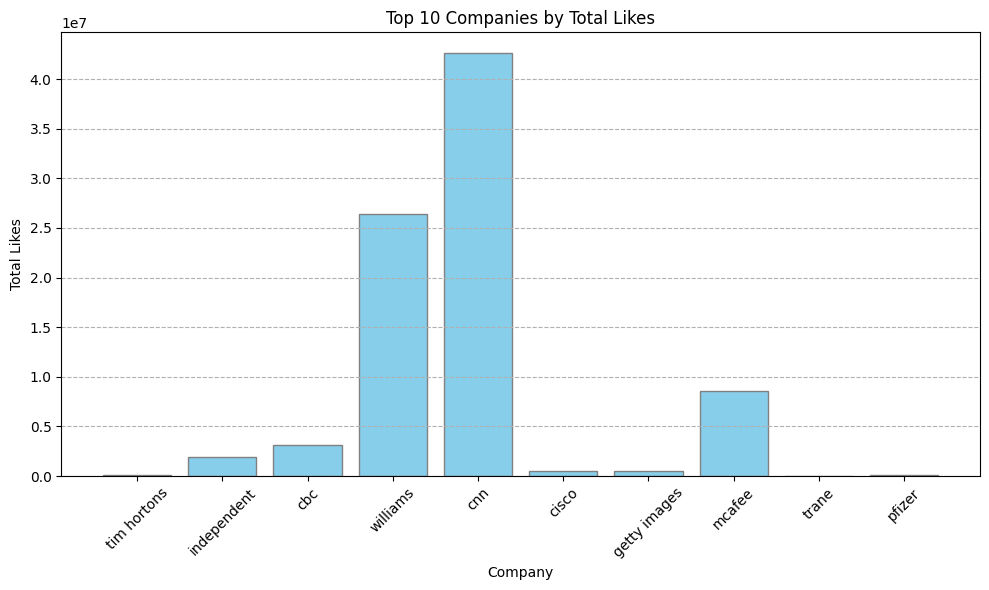

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

#first 10 unique companies
unique_companies = df['inferred company'].unique()[:10]

# null list
total_c1 = []

# Loop for total company
for company in unique_companies:
    total = df[df['inferred company'] == company]['likes'].sum()
    total_c1.append(company)
    print(total_c1)

# loop for total_likes
total_likes = []
for company in unique_companies:
    total = df[df['inferred company'] == company]['likes'].sum()
    total_likes.append(total)
    print(f"Total likes {total}")
    print(sum(total_likes))

    
plt.figure(figsize=(10, 6))
plt.bar(total_c1, total_likes, color='skyblue', edgecolor='gray')

#graph
plt.xlabel('Company')
plt.ylabel('Total Likes')
plt.title('Top 10 Companies by Total Likes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
### for train the data and to predict the likes we use sklearn lib and by regression using algorithm.
### I will use FASTAPI by which that accepts new post data as input and returns predicted likes.
